<a href="https://colab.research.google.com/github/Lstemm/DSC-502/blob/main/DSC_502_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(Copied from the Slack)

Bar Chart: Showing the highest win rate champions played during the patch/sample size. Maybe we could filter champions based on whether they're mentioned at least 3 times for fair comparisons.

Scatter Plot:  We could plot each game's duration against the difference of gold from the winning team compared to the losing team (winning team gold - losing team gold = the gold difference we plot). That way, we could show that the longer the games go on, the more likely it is to be a wide difference in gold accumulation.

Pie Chart: I think this would be best showing that you have a higher chance of winning if you start on a certain side (red side vs blue side in this case).

Line Chart: I think what we could do is show both win rates by duration for both blue and red side starts. We might have to make two line charts for this to make it less messy, but ideally, we could separate the game durations into buckets like 0-20 minutes, 20-25 minutes, 25-30 minutes, 30-35 minutes, and 35+ minutes, and then add in the win_loss percent against each time bucket.

All of these would show trends like the highest champion win rate during the patch, how longer matches allow teams to snowball and widen gaps in gold, and in wins/losses, how starting one side of the map is actually already in favor of one side (usually it's blue from my understanding, but I am curious to see if this gets reflected based on the small sample size), and lastly maybe if red is more likely to win shorter games, or if blue side is more likely to win longer games.

In [ ]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load libraries and CSV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

with open(r"/content/drive/MyDrive/League_of_Legends_Data - Sheet1 (2).csv") as f:
    reader = csv.DictReader(f)
    League_of_Legends_Data = list(reader)

In [ ]:
# Create Data Frame
df = pd.DataFrame(League_of_Legends_Data)
df.head(10)

,match_id,game_duration,patch_version,queue_type,team,role,champion,win_loss,kills,deaths,assists,cs,cs_per_min,gold_earned,damage,vision_score,first_blood,game_review
0,5486945849,0:24:40,26.3,ranked,blue,top,Dr.Mundo,win,15,5,8,203,8.2,14609,28831,8,no,Late Bloomer
1,5486945849,0:24:40,26.3,ranked,blue,jungle,Diana,win,12,2,11,151,6.1,12186,22058,27,no,Unstoppable
2,5486945849,0:24:40,26.3,ranked,blue,mid,Vex,win,5,2,10,133,5.4,8460,18730,20,no,Late Bloomer
3,5486945849,0:24:40,26.3,ranked,blue,adc,Jinx,win,10,1,7,228,9.2,13573,29852,12,no,Unstoppable
4,5486945849,0:24:40,26.3,ranked,blue,support,Nami,win,0,2,25,14,0.6,7945,6698,29,no,Unstoppable
5,5486945849,0:24:40,26.3,ranked,red,top,Vayne,loss,4,10,3,146,5.9,9493,29556,13,no,Downfall
6,5486945849,0:24:40,26.3,ranked,red,jungle,Master Yi,loss,6,6,2,121,4.9,9871,18312,29,yes,Downfall
7,5486945849,0:24:40,26.3,ranked,red,mid,Galio,loss,2,6,4,160,6.5,8590,19269,10,no,Struggle
8,5486945849,0:24:40,26.3,ranked,red,adc,Kai'Sa,loss,0,9,1,181,7.3,8834,10328,12,no,Struggle
9,5486945849,0:24:40,26.3,ranked,red,support,Nautilus,loss,0,11,5,32,1.3,6272,8556,57,no,Struggle


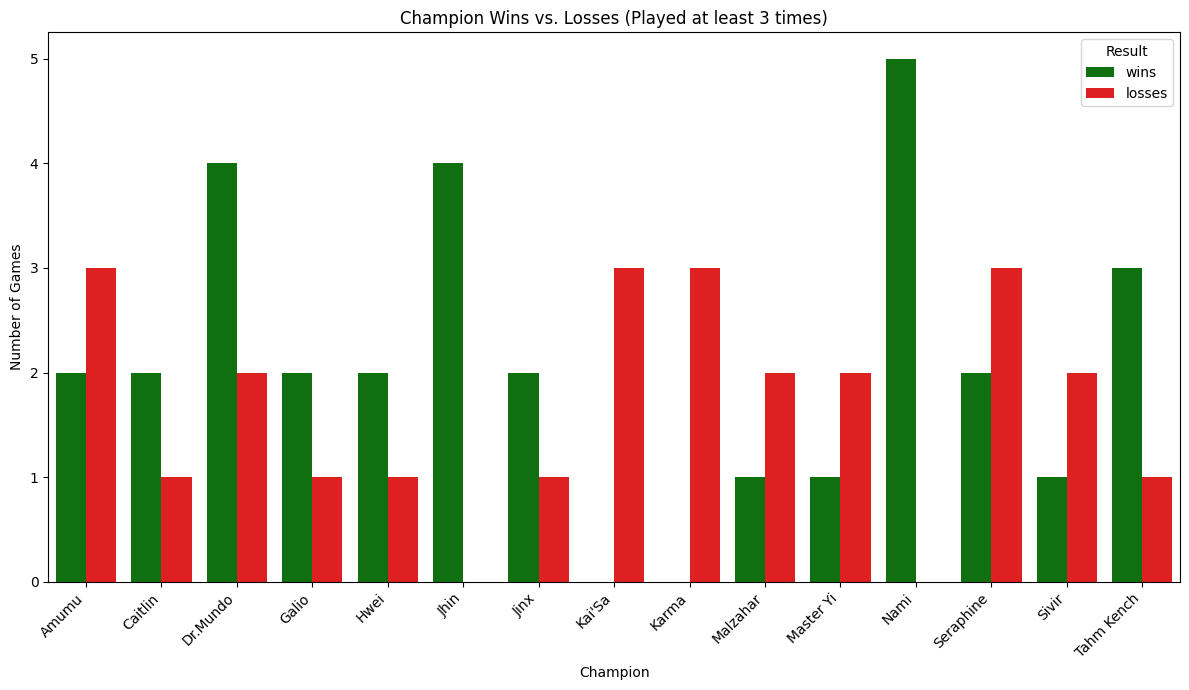

In [ ]:
winners = df[(df['win_loss'] == 'win')]
champ_win_counts = winners['champion'].value_counts().reset_index()
champ_win_counts.columns = ['champion', 'wins']

losers = df[(df['win_loss'] == 'loss')]
champ_loss_counts = losers['champion'].value_counts().reset_index()
champ_loss_counts.columns = ['champion', 'losses']

combined_counts = pd.merge(champ_win_counts, champ_loss_counts, on='champion', how='outer').fillna(0)
combined_counts['total_plays'] = combined_counts['wins'] + combined_counts['losses']

filtered_champions = combined_counts[combined_counts['total_plays'] >= 3]

melted_df = filtered_champions.melt(id_vars=['champion', 'total_plays'], value_vars=['wins', 'losses'], var_name='result', value_name='count')

plt.figure(figsize=(12, 7))
sns.barplot(x='champion', y='count', hue='result', data=melted_df, palette={'wins': 'green', 'losses': 'red'})
plt.title('Champion Wins vs. Losses (Played at least 3 times)')
plt.xlabel('Champion')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Result')
plt.tight_layout()
plt.show()

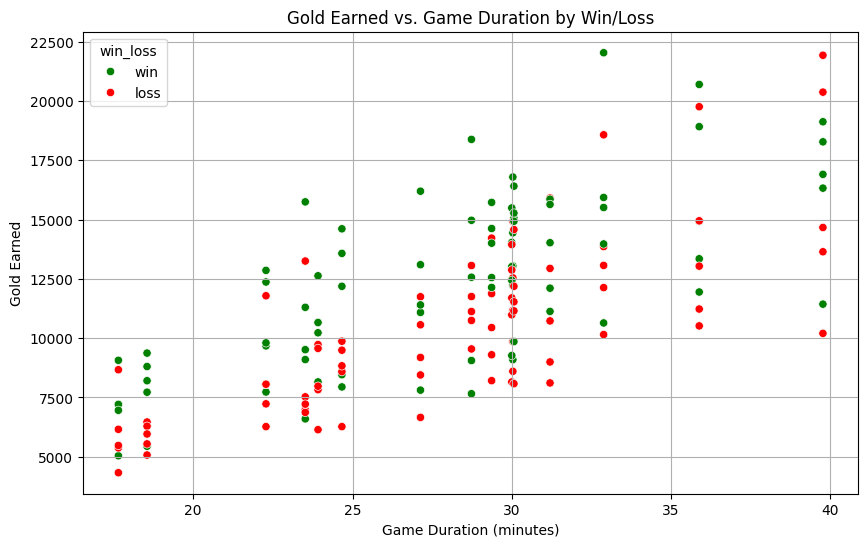

In [ ]:
# Scatter Plot


df['gold_earned'] = pd.to_numeric(df['gold_earned'], errors='coerce')


def convert_duration_to_minutes(duration_str):
    parts = str(duration_str).split(':')
    if len(parts) == 3:
        h, m, s = map(int, parts)
    elif len(parts) == 2:
        h = 0
        m, s = map(int, parts)
    else:
        return 0
    return h * 60 + m + s / 60

df['game_duration_minutes'] = df['game_duration'].apply(convert_duration_to_minutes)


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='game_duration_minutes',
    y='gold_earned',
    hue='win_loss',
    palette={'win': 'green', 'loss': 'red'}
)
plt.xlabel('Game Duration (minutes)')
plt.ylabel('Gold Earned')
plt.title('Gold Earned vs. Game Duration by Win/Loss')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Total Wins from Each Team'}, ylabel='count'>

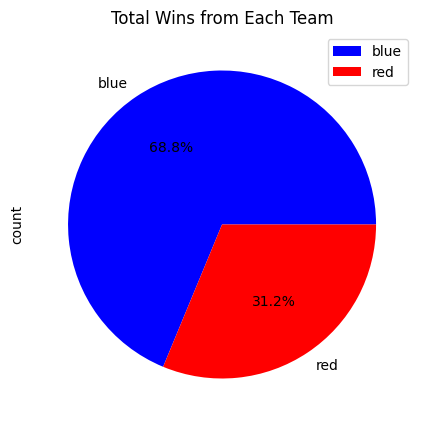

In [ ]:
# Pie Chart

winners = df[(df['win_loss'] == 'win')]
team_win_counts = winners['team'].value_counts()
colors = ['blue', 'red']

team_win_counts.plot.pie(autopct='%1.1f%%', legend=True, figsize=(6,5), title='Total Wins from Each Team', colors=colors)

The Blue Team Has won far more times then the Red Team, suggesting that one would have better chances of winning if they started on the Blue Team.

In [ ]:
# Line Charts

df['gold_earned'] = pd.to_numeric(df['gold_earned'], errors='coerce')

def convert_duration_to_minutes(duration_str):
    parts = str(duration_str).split(':')
    if len(parts) == 3:
        h, m, s = map(int, parts)
    elif len(parts) == 2:
        h = 0
        m, s = map(int, parts)
    else:
        return 0
    return h * 60 + m + s / 60

df['game_duration_minutes'] = df['game_duration'].apply(convert_duration_to_minutes)


In [ ]:
duration_bins = [0, 20, 25, 30, 35, float('inf')]
duration_labels = ['0-20', '20-25', '25-30', '30-35', '35+']

df['duration_bucket'] = pd.cut(df['game_duration_minutes'], bins=duration_bins, labels=duration_labels, right=False)

blue_wins = df[(df['team'] == 'blue') & (df['win_loss'] == 'win')].groupby('duration_bucket').size().reindex(duration_labels, fill_value=0)
blue_total_games = df[df['team'] == 'blue'].groupby('duration_bucket').size().reindex(duration_labels, fill_value=0)
blue_win_rate = (blue_wins / blue_total_games * 100).fillna(0)

red_wins = df[(df['team'] == 'red') & (df['win_loss'] == 'win')].groupby('duration_bucket').size().reindex(duration_labels, fill_value=0)
red_total_games = df[df['team'] == 'red'].groupby('duration_bucket').size().reindex(duration_labels, fill_value=0)
red_win_rate = (red_wins / red_total_games * 100).fillna(0)

win_rates_df = pd.DataFrame({
    'duration_bucket': duration_labels,
    'blue_win_rate': blue_win_rate.values,
    'red_win_rate': red_win_rate.values
})


/tmp/ipython-input-3294029386.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blue_wins = df[(df['team'] == 'blue') & (df['win_loss'] == 'win')].groupby('duration_bucket').size().reindex(duration_labels, fill_value=0)
/tmp/ipython-input-3294029386.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blue_total_games = df[df['team'] == 'blue'].groupby('duration_bucket').size().reindex(duration_labels, fill_value=0)
/tmp/ipython-input-3294029386.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current be

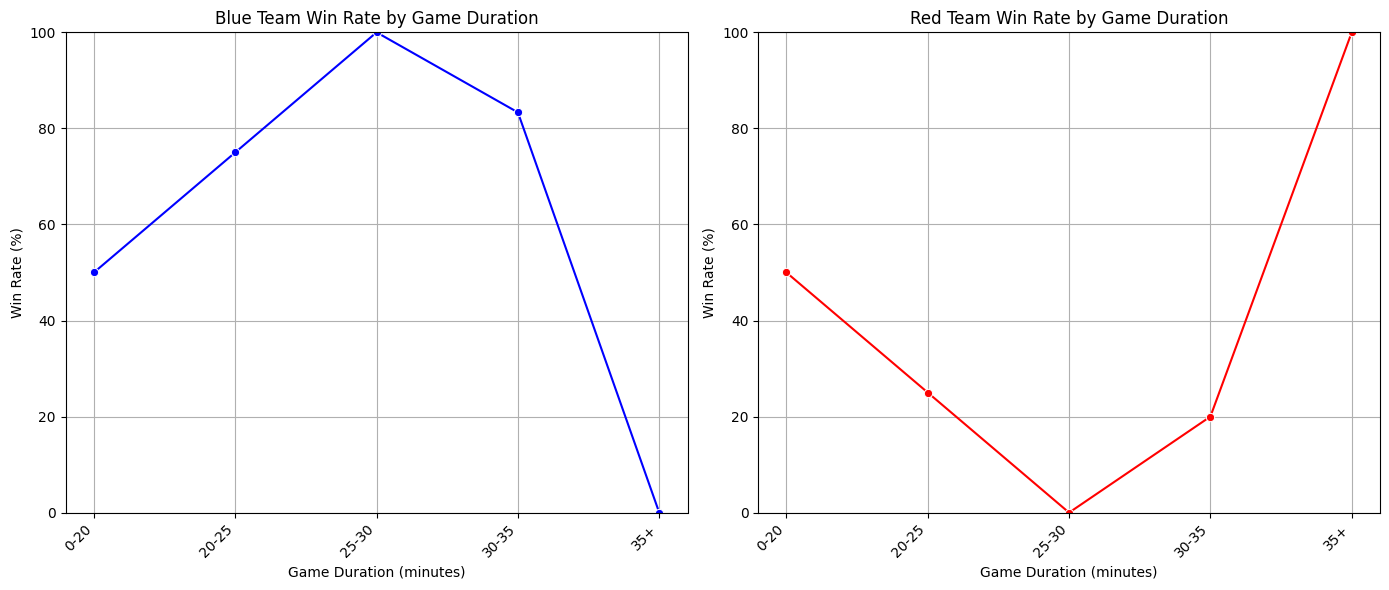

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='duration_bucket', y='blue_win_rate', data=win_rates_df, marker='o', color='blue')
plt.title('Blue Team Win Rate by Game Duration')
plt.xlabel('Game Duration (minutes)')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.xticks(rotation=45, ha='right')


plt.subplot(1, 2, 2)
sns.lineplot(x='duration_bucket', y='red_win_rate', data=win_rates_df, marker='o', color='red')
plt.title('Red Team Win Rate by Game Duration')
plt.xlabel('Game Duration (minutes)')
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
